<a href="https://colab.research.google.com/github/XojiakbarBurxonov/DATA_SCIENCE/blob/main/customer_segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


In [ ]:
url="https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/customer_segmentation.csv"
df = pd.read_csv(url)
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB


In [ ]:
df['Defaulted'].value_counts(dropna = False)

Defaulted
0.0    517
1.0    183
NaN    150
Name: count, dtype: int64

### Data Cleaning
 Address column is string that you can not use it to compute distance, that is why we will drop it

In [ ]:
df = df.drop(columns = ['Address'])
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,5,47,1,31,253,9.308,8.908,0.0,7.2


### Normalization

    Normalize all columns except Customer Id


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
X = df.values[:,1:]
scaler = StandardScaler()
imputer = SimpleImputer(strategy = 'mean')
pipeline = make_pipeline(scaler, imputer)
X_scaled = pipeline.fit_transform(X)
X_scaled

array([[ 0.74291541,  0.31212243, -0.37878978, ..., -0.59048916,
        -0.59494973, -0.57652509],
       [ 1.48949049, -0.76634938,  2.5737211 , ...,  1.51296181,
        -0.59494973,  0.39138677],
       [-0.25251804,  0.31212243,  0.2117124 , ...,  0.80170393,
         1.68081427,  1.59755385],
       ...,
       [-1.24795149,  2.46906604, -1.26454304, ...,  0.03863257,
         1.68081427,  3.45892281],
       [-0.37694723, -0.76634938,  0.50696349, ..., -0.70147601,
        -0.59494973, -1.08281745],
       [ 2.1116364 , -0.76634938,  1.09746566, ...,  0.16463355,
        -0.59494973, -0.2340332 ]], shape=(850, 8))

# Model

    The dataset contains info about client's age, years Employed, Income, card debt, other debts.
    The goal is to cluster customers based on this info

In [ ]:
k_means = KMeans(n_clusters = 3) # Instantiate model with 3 clusters
k_means.fit(X_scaled) # Fit model to X_scaled data


KMeans(n_clusters=3)

In [ ]:
# Get the predicted labels from model and assign 'cluster column
df['cluster']= k_means.labels_
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,cluster
0,1,41,2,6,19,0.124,1.073,0.0,6.3,1
1,2,47,1,26,100,4.582,8.218,0.0,12.8,2
2,3,33,2,10,57,6.111,5.802,1.0,20.9,2
3,4,29,2,4,19,0.681,0.516,0.0,6.3,1
4,5,47,1,31,253,9.308,8.908,0.0,7.2,2


In [ ]:
df['cluster'].unique()

array([1, 2, 0], dtype=int32)

### What can we say about cluster?

 #### We can get information by finding each centroid of clusters using 'groupby' and 'mean' functions


In [ ]:
df.groupby('cluster').mean()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
cluster,,,,,,,,,
0,412.336806,41.427083,1.555556,13.684028,59.524306,1.411528,3.057736,0.056769,8.232986
1,434.757261,30.224066,1.719917,4.371369,28.344398,0.919087,1.855471,0.341584,9.953527
2,417.112500,40.950000,2.212500,15.412500,110.862500,6.134713,10.524900,0.477612,18.465000


## 1. Understanding the Columns:
    Customer Id: Unique identifier for customers.
    Age: Age of the customer.
    Edu: Level of education (possibly categorical but represented numerically).
    Years Employed: Number of years the customer has been employed.
    Income: Customer's annual income.
    Card Debt: Outstanding credit card debt.
    Other Debt: Other types of debts the customer has.
    Defaulted: Whether the customer has defaulted on debt (0 = No, 1 = Yes).
    DebtIncomeRatio: Ratio of total debt to income.
## 2. Summary of the Clusters (Rows):
    Cluster 0
        Age: ~34.64 years
        Years Employed: ~8.22 years
        Income: ~$37.93K
        Card Debt: ~$0.82K
        Other Debt: ~$1.76K
        Default Rate: Very low (0.007 or ~0.7%)
        Debt-to-Income Ratio: Low (~7.26%)
    ➡ Interpretation: A relatively young group with moderate income, low card debt, and very low default risk.
    Cluster 1
        Age: ~43.48 years
        Years Employed: ~17.78 years
        Income: ~$107.82K
        Card Debt: ~$4.56K
        Other Debt: ~$8.49K
        Default Rate: Moderate (~21.2%)
        Debt-to-Income Ratio: Moderate (~14.1%)
    ➡ Interpretation: Older customers with high income but carrying significantly more debt. They have a higher default rate, possibly due to larger financial obligations.
    Cluster 2
        Age: ~30.92 years
        Years Employed: ~3.88 years
        Income: ~$31.66K
        Card Debt: ~$1.66K
        Other Debt: ~$3.09K
        Default Rate: Very High (~84.6%)
        Debt-to-Income Ratio: Very High (~15.03%)
    ➡ Interpretation: The youngest group, with the lowest income and highest default rate. They have a high debt-to-income ratio, making them more financially vulnerable.
## 3. Key Insights:
    Cluster 0 is financially stable, with low debt and almost no default risk.
    Cluster 1 has higher income but also higher debt and a moderate risk of default.
    Cluster 2 is the riskiest group, with low income, high debt, and an extremely high default rate (~85%).

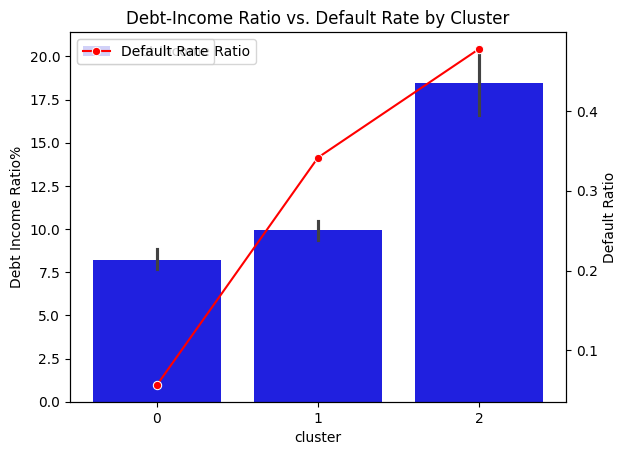

In [ ]:
# Debt-to-Income Ratio vs. Default Rate (Bar Chart)
import seaborn as sns
fig, ax = plt.subplots()
ax = sns.barplot(x=df['cluster'],y= df['DebtIncomeRatio'], color = 'blue', label= 'Debt Income Ratio')
# plt.plot(df['cluster'],df['Defaulted'],label='Defaulted' marker='o',color='red')
ax2=ax.twinx()
ax2=sns.lineplot(x=df['cluster'],y= df['Defaulted'],color='red', marker='o', label = 'Default Rate', ax=ax2, errorbar=None)
ax.set_ylabel("Debt Income Ratio%")
ax2.set_ylabel("Default Ratio")
plt.title("Debt-Income Ratio vs. Default Rate by Cluster")
plt.legend()

plt.show()

# Income vs. Debt Distribution (Scatter Plot)

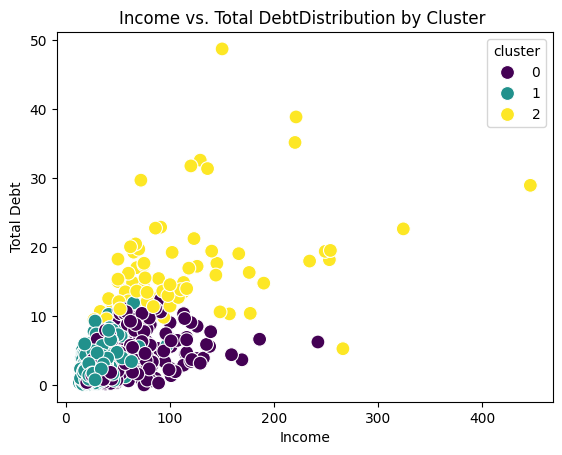

In [ ]:
fig, ax =plt.subplots()
ax= sns.scatterplot( x=df['Income'], y=df['Card Debt']+df['Other Debt'],hue=df['cluster'], palette="viridis", s=100)
ax.set_title("Income vs. Total DebtDistribution by Cluster ")
ax.set_ylabel("Total Debt")

plt.show()

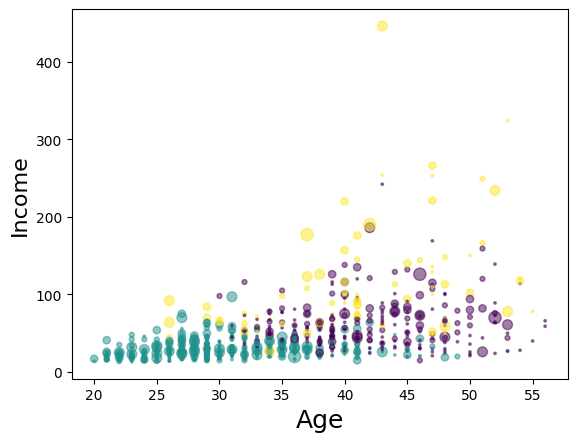

In [ ]:
area = np.pi * ( X[:, 1])**2
plt.scatter(X[:, 0], X[:, 3], s=area, c=k_means.labels_.astype(float), alpha=0.5)
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)

plt.show()

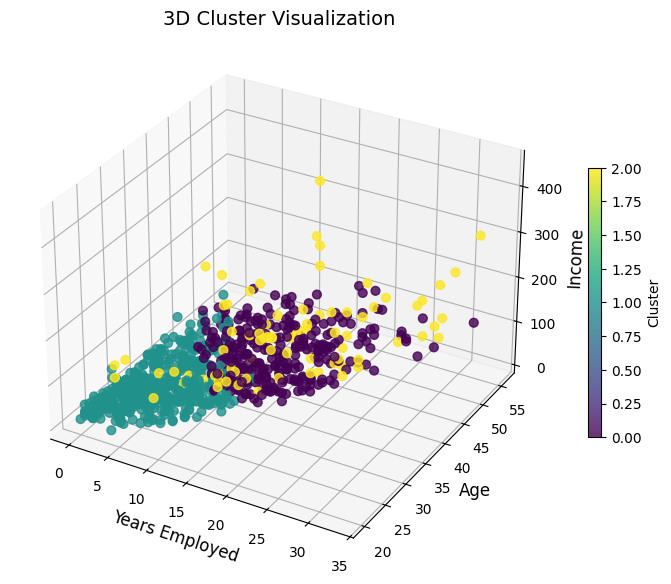

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs


# Create 3D figure
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Labels
ax.set_xlabel('Years Employed', fontsize=12)
ax.set_ylabel('Age', fontsize=12)
ax.set_zlabel('Income', fontsize=12)
ax.set_title('3D Cluster Visualization', fontsize=14)

# Scatter plot with cluster colors
scatter = ax.scatter(X[:, 2], X[:, 0], X[:, 3], c=k_means.labels_, cmap='viridis', s=40, alpha=0.8)

# Add color bar
cbar = plt.colorbar(scatter, ax=ax, shrink=0.5)
cbar.set_label('Cluster')

# Show the plot
plt.show()
